In [1]:
using Pkg
### use the Project and Manifest tomls to construct same environment, then activate:
Pkg.activate(".")

using ACE1pack, ACE1, IPFitting
using Statistics
using Random
using LinearAlgebra
using Distributions
using Plots
using StatsPlots

### set plotting defaults
pyplot()
default(fmt = :svg,size=(800,800),ms=5,lw=1.5,xtickfontsize=14,ytickfontsize=14,xguidefontsize=16,yguidefontsize=16,
legendfontsize=14,titlefontsize=16, foreground_color_legend = nothing,background_color_legend = nothing, fg_legend = :false)
# legend(frameon=false)

using LaTeXStrings
using ColorSchemes
using DataFrames
using CSV

### Use own modules
using IB_BayesianLinearRegression
using ConformalPredictions

### Use code snippets
include("./code/ACE_fs.jl")
using .ACE_fs

include("./code/QoIEvaluators.jl")
using .QoIEvaluators

  Activating project at `~/mmm10paper_github/SiliconUQ`
┌ Warning: Module ASE with build ID ffffffff-ffff-ffff-0001-9945924cf8cc is missing from the cache.
│ This may mean ASE [51974c44-a7ed-5088-b8be-3e78c8ba416c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
┌ Warning: Module IPFitting with build ID ffffffff-ffff-ffff-0001-9950ef39ebb0 is missing from the cache.
│ This may mean IPFitting [3002bd4c-79e4-52ce-b924-91256dde4e52] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


LoadError: LoadError: PyError (PyImport_ImportModule) <class 'FileNotFoundError'>
FileNotFoundError(2, 'No such file or directory')
  File "/home/eng/phrkbw/.julia/conda/3/lib/python3.10/site-packages/pyjulip.py", line 7, in <module>
    jl = Julia(compiled_modules=False)
  File "/home/eng/phrkbw/.julia/conda/3/lib/python3.10/site-packages/julia/core.py", line 468, in __init__
    jlinfo = JuliaInfo.load(runtime)
  File "/home/eng/phrkbw/.julia/conda/3/lib/python3.10/site-packages/julia/juliainfo.py", line 68, in load
    proc = subprocess.Popen(
  File "/home/eng/phrkbw/.julia/conda/3/lib/python3.10/subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/home/eng/phrkbw/.julia/conda/3/lib/python3.10/subprocess.py", line 1847, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)

in expression starting at /home/eng/phrkbw/mmm10paper_github/SiliconUQ/code/QoIEvaluators.jl:1
in expression starting at /home/eng/phrkbw/mmm10paper_github/SiliconUQ/code/ACE_fs.jl:1

In [2]:
### DFT reference results

dft_bulk_modulus = 88.596696666666602

dft_c11=153.28990999999988
dft_c12=56.25008999999995
dft_c44=72.176929999999999;

dft_vfe = 3.6732338007932412;

dft_migration_path = [3.62673612056642, 3.6525185844820953, 3.722158915757973, 3.825509338568736, 
    3.9117284704134363, 3.925445864948415, 3.8606456924135273, 3.761658791161608, 3.6808647102116083, 
    3.6386444156723883, 3.6267294104800385];

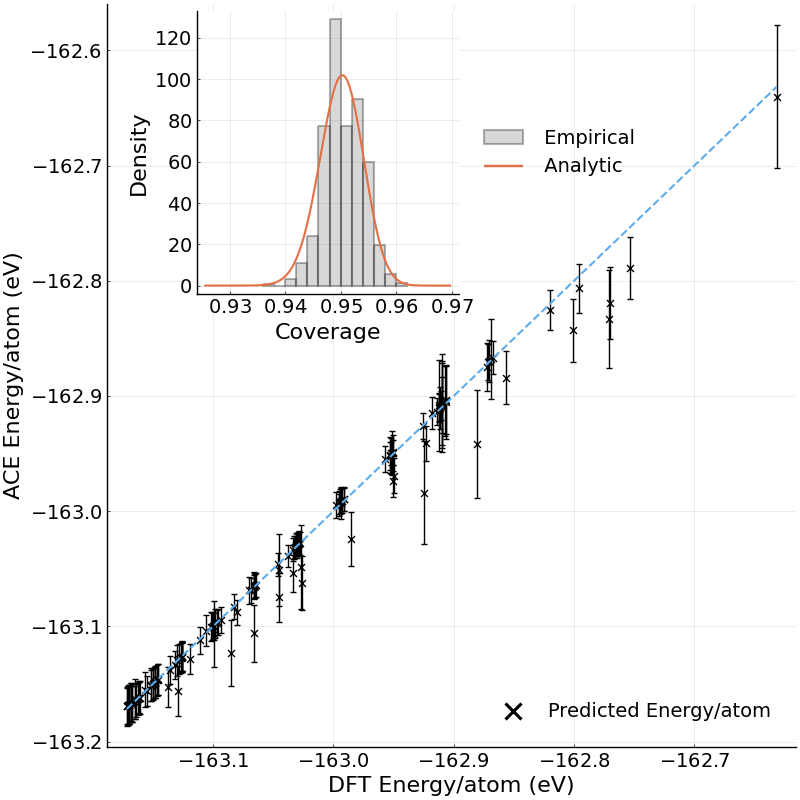

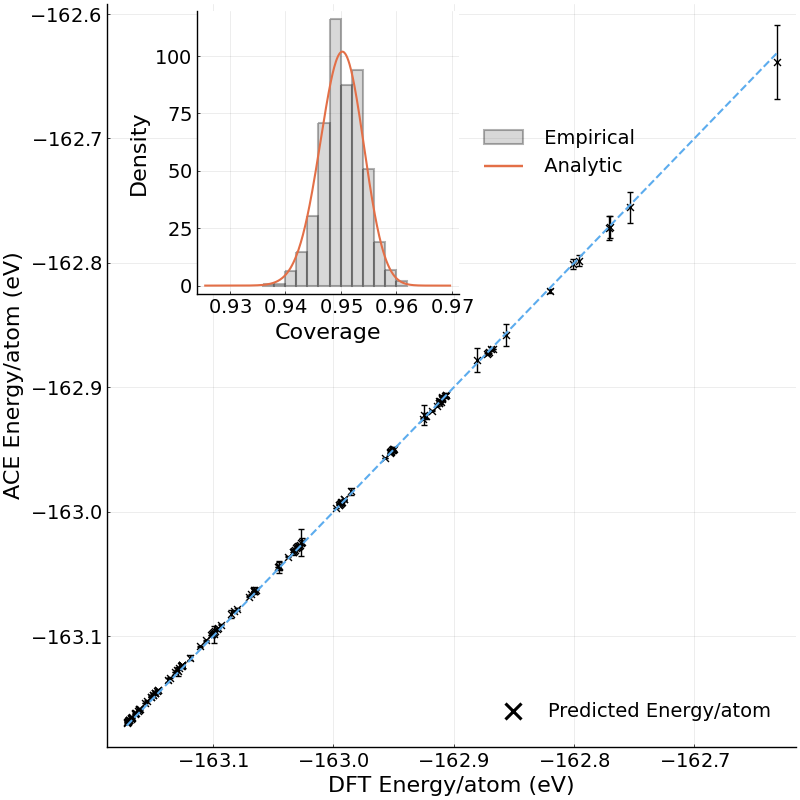

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [3]:
### Figure 1

### get coverages and conformal info for both potentials
ζ3,n3,n_val3,l3 = CSV.read("./outputs/coverages/dia300_degsite_3.csv",DataFrame)[!,1][1],
            CSV.read("./outputs/coverages/dia300_degsite_3.csv",DataFrame)[!,2][1],
            CSV.read("./outputs/coverages/dia300_degsite_3.csv",DataFrame)[!,3][1],
            CSV.read("./outputs/coverages/dia300_degsite_3.csv",DataFrame)[!,4][1];

ζ19,n19,n_val19,l19 = CSV.read("./outputs/coverages/dia300_degsite_19.csv",DataFrame)[!,1][1],
            CSV.read("./outputs/coverages/dia300_degsite_19.csv",DataFrame)[!,2][1],
            CSV.read("./outputs/coverages/dia300_degsite_19.csv",DataFrame)[!,3][1],
            CSV.read("./outputs/coverages/dia300_degsite_19.csv",DataFrame)[!,4][1];

coverages3 = eval(Meta.parse(CSV.read("./outputs/coverages/dia300_degsite_3.csv",DataFrame)[!,5][1]));
coverages19 = eval(Meta.parse(CSV.read("./outputs/coverages/dia300_degsite_19.csv",DataFrame)[!,5][1]));

### get true and predicted energies of structures in test set for accuracy plot (and st devs, and q̂)
num_atoms3, test_energy_true3,test_energy_mean3,test_energy_std3,q̂3 = eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_3.csv",DataFrame)[!,1][1])),
    eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_3.csv",DataFrame)[!,2][1])),
    eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_3.csv",DataFrame)[!,3][1])),
    eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_3.csv",DataFrame)[!,4][1])),
    CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_3.csv",DataFrame)[!,5][1];

num_atoms19, test_energy_true19,test_energy_mean19,test_energy_std19,q̂19 = eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_19.csv",DataFrame)[!,1][1])),
    eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_19.csv",DataFrame)[!,2][1])),
    eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_19.csv",DataFrame)[!,3][1])),
    eval(Meta.parse(CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_19.csv",DataFrame)[!,4][1])),
    CSV.read("./outputs/coverages/dia300_energy_accuracy_data_degsite_19.csv",DataFrame)[!,5][1];


### combine & plot
plt1a=scatter(test_energy_true3./num_atoms3, test_energy_mean3./num_atoms3, yerr=test_energy_std3.*q̂3./num_atoms3,
    marker=:x,label="Predicted Energy/atom", inset=(1,bbox(0.13, 0.01, 0.38, 0.38, :top, :left)), colour=:black)
plot!(plt1a, [minimum(test_energy_true3./num_atoms3), maximum(test_energy_true3./num_atoms3)],
    [minimum(test_energy_true3./num_atoms3), maximum(test_energy_true3./num_atoms3)],
    ls=:dash,colour=:steelblue2,label="",legend=:bottomright)
xlabel!(plt1a,"DFT Energy/atom (eV)")
ylabel!(plt1a,"ACE Energy/atom (eV)")

histogram!(plt1a[2],coverages3,normalize=:true,bins=20,alpha=0.3,label=" Empirical",
    xlabel="Coverage",ylabel="Density",colour=:grey)
plot!(plt1a[2],right_margin=-50Plots.mm)

c_j_analytic = BetaBinomial(n_val3,n3+1-l3,l3)
ix = findall(x->x>1e-9,pdf(c_j_analytic))

### plot the analytic answer (and scale y axis to match histogram)
plot!(plt1a[2],LinRange(0,1,length(pdf(c_j_analytic)))[ix],
        pdf(c_j_analytic)[ix]*n_val3,label=" Analytic",legend=:outerright)



plt1b=scatter(test_energy_true19./num_atoms19, test_energy_mean19./num_atoms19, yerr=test_energy_std19.*q̂19./num_atoms19,
    marker=:x,label="Predicted Energy/atom", inset=(1,bbox(0.13, 0.01, 0.38, 0.38, :top, :left)), colour=:black)
plot!(plt1b, [minimum(test_energy_true19./num_atoms19), maximum(test_energy_true19./num_atoms19)],
    [minimum(test_energy_true19./num_atoms19), maximum(test_energy_true19./num_atoms19)],
    ls=:dash,colour=:steelblue2,label="",legend=:bottomright)
xlabel!(plt1b,"DFT Energy/atom (eV)")
ylabel!(plt1b,"ACE Energy/atom (eV)")

histogram!(plt1b[2],coverages19,normalize=:true,bins=20,alpha=0.3,label=" Empirical",
    xlabel="Coverage",ylabel="Density",colour=:grey)
plot!(plt1b[2],right_margin=-50Plots.mm)

c_j_analytic = BetaBinomial(n_val19,n19+1-l19,l19)
ix = findall(x->x>1e-9,pdf(c_j_analytic))

### plot the analytic answer (and scale y axis to match histogram)
plot!(plt1b[2],LinRange(0,1,length(pdf(c_j_analytic)))[ix],
        pdf(c_j_analytic)[ix]*n_val19,label=" Analytic",legend=:outerright)


# savefig(plt1a, "./figures/Figure1a.png")
# savefig(plt1b, "./figures/Figure1b.png")

# savefig(plt1a, "./figures/Figure1a.pdf")
# savefig(plt1b, "./figures/Figure1b.pdf")

display(plt1a)
display(plt1b)

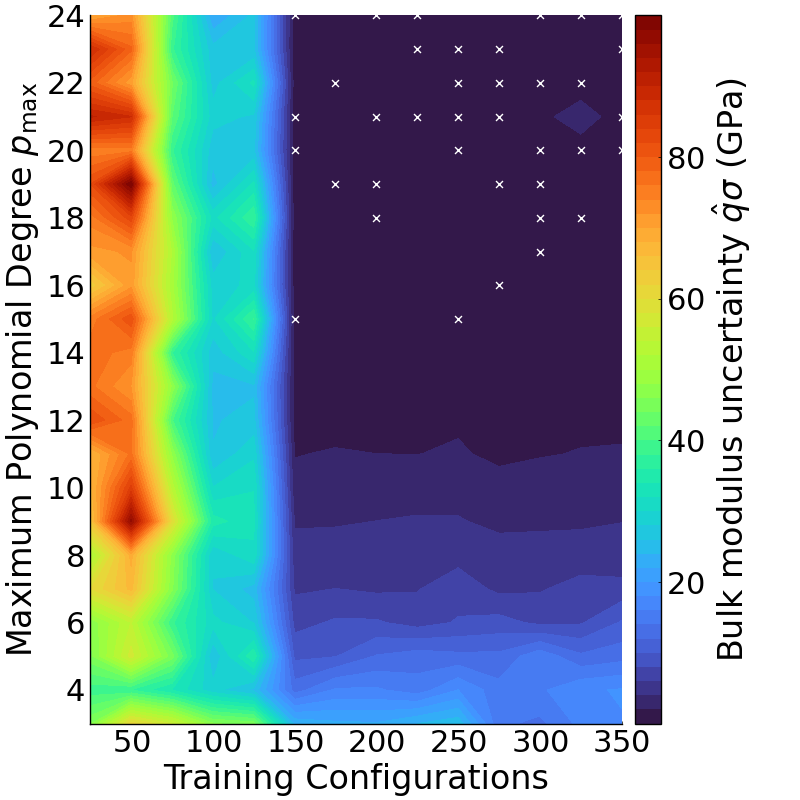

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [4]:
### Figure 2

### read in data
deg_site_list = collect(3:24)

k = collect(25:25:350)
dfs2 = DataFrame.(CSV.File.(["./outputs/bulk_modulus/dia$(i).csv" for i in k]));

### numbers corresponding to k, max poly degree / deg site list values for plotting
num_coeffs = [9.0, 13.0, 19.0, 28.0, 40.0, 57.0, 81.0, 113.0, 156.0, 214.0, 289.0, 386.0, 512.0, 671.0, 871.0, 
    1122.0, 1432.0, 1812.0, 2278.0, 2841.0, 3518.0, 4330.0];
num_data = [2029.0, 3692.0, 6123.0, 10192.0, 13151.0, 17490.0, 20101.0, 21680.0, 24315.0, 27706.0, 30533.0,
    33462.0, 36127.0, 38870.0];

    x1_ = collect(1:14)
    x2_ = collect(1:22)

### track if prediction(s) agree with DFT, save for plotting
a_ = []
b_ = []
for x1 in x1_
    for x2 in x2_        
        set = [mean(eval(Meta.parse(dfs2[x1][x2,"QoI_list"]))) - std(eval(Meta.parse(dfs2[x1][x2,"QoI_list"]))) * dfs2[x1][x2,"q̂_list"],mean(eval(Meta.parse(dfs2[x1][x2,"QoI_list"]))) + std(eval(Meta.parse(dfs2[x1][x2,"QoI_list"]))) * dfs2[x1][x2,"q̂_list"]]
        if (set[1] < dft_bulk_modulus < set[2]) == false
            push!(a_,x1)
            push!(b_,x2)
        end
    end
end

### get st devs and errors for bulk modulus
B_stds = Matrix{Float64}(undef,length(deg_site_list),length(k))
B_errs = Matrix{Float64}(undef,length(deg_site_list),length(k))
for (count,df) in enumerate(dfs2)
    a = eval.(Meta.parse.(df[1:22,"QoI_list"]))
    for i in 1:length(a)
        b = a[i][findall(x->x>0.0,a[i])]
        B_stds[i,count] = std(b)
        B_errs[i,count] = std(b) * df.q̂_list[i]
    end
end


clims = (0.0009450134903232765, 99.89156612653741)
num_contour_levels = 50

### do contour plotting of conformal errors
plt2 = contour(k,deg_site_list,B_errs,colour=:turbo,clabels=false,cb=:left,cbar=true,fill=true,yticks=false,
    clims=clims,levels=num_contour_levels,lw=0,colorbar_title = L"\mathrm{Bulk \,\, modulus \,\, uncertainty \,\,} \hat{q}\sigma \,\, \mathrm{(GPa)}",
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,ytickfontsize=22, legendfontsize=22)
xlabel!(plt2,"Training Configurations")
ylabel!(plt2,L"\mathrm{Maximum \,\, Polynomial \,\, Degree} \,\, p_{\mathrm{max}}")
yticks!(plt2,deg_site_list[2:2:end],string.(Int.(deg_site_list))[2:2:end])
# scatter!(twinx(),deg_site_list,repeat([NaN],length(num_coeffs)),label="",
#             yticks=(deg_site_list[2:2:end],string.(Int.(num_coeffs))[2:2:end]),ylabel="Number of Coefficients")
# scatter!(twiny(),k,repeat([NaN],length(k)),label="",xticks=(k[2:2:end],string.(Int.(num_data))[2:2:end]),
#             xlabel="Number of Data points")
xlims!((k[1],k[end]))
ylims!((deg_site_list[1],deg_site_list[end]))

### mark points which do not agree with DFT reference
for i in 1:length(a_)
    scatter!(plt2,[k[a_[i]]],[deg_site_list[b_[i]]],marker=:x,markercolour=:white,label="")
end

# savefig(plt2, "./figures/Figure2.png")
# savefig(plt2, "./figures/Figure2.pdf")
display(plt2)

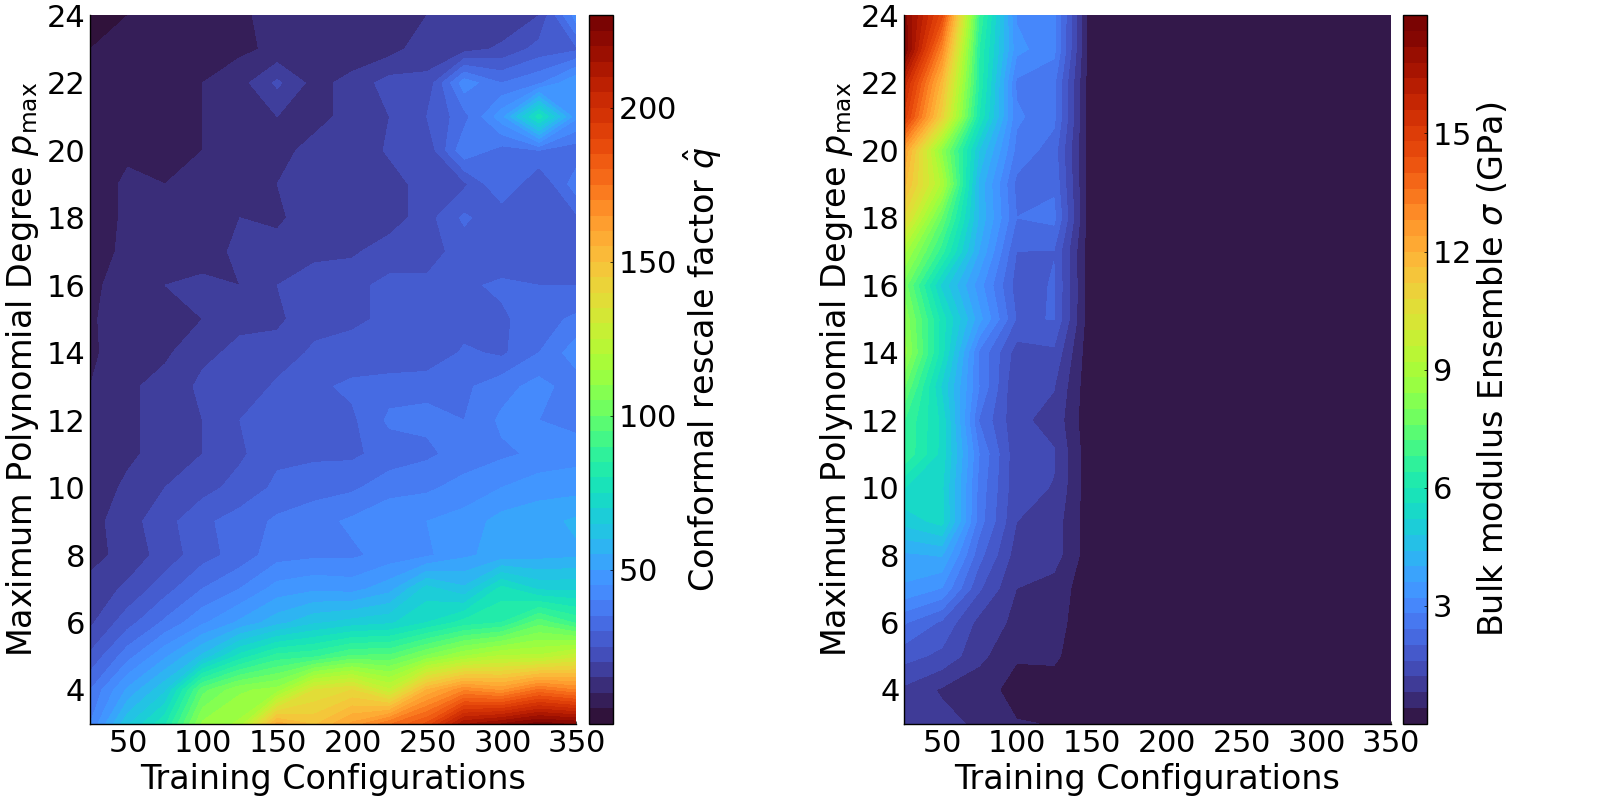

In [5]:
### Figure 3

### get q̂ values
qhat_matrix = Matrix{Float64}(undef,length(deg_site_list),length(k))
for (count,df) in enumerate(dfs2)
    qhat_matrix[:,count] = df[1:22,"q̂_list"]
end

# qhat_matrix
plt3a = contour(k,deg_site_list,qhat_matrix,colour=:turbo,clabels=false,cbar=true,fill=true,levels=num_contour_levels,
    colorbar_title = L"\mathrm{Conformal \,\, rescale \,\, factor \,\,} \hat{q}",lw=0,
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,ytickfontsize=22, legendfontsize=22)
yticks!(deg_site_list[2:2:end],string.(Int.(deg_site_list))[2:2:end])
xlabel!("Training Configurations")
ylabel!(L"\mathrm{Maximum \,\, Polynomial \,\, Degree} \,\, p_{\mathrm{max}}")

# stds_matrix
plt3b = contour(k,deg_site_list,B_stds,colour=:turbo,clabels=false,cbar=true,fill=true,levels=num_contour_levels,
    colorbar_title=L"\mathrm{Bulk \,\, modulus \,\, Ensemble \,\,} \sigma \,\, \mathrm{(GPa)}",lw=0,
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,ytickfontsize=22, legendfontsize=22)
yticks!(deg_site_list[2:2:end],string.(Int.(deg_site_list))[2:2:end])
xlabel!("Training Configurations")
ylabel!(L"\mathrm{Maximum \,\, Polynomial \,\, Degree} \,\, p_{\mathrm{max}}")

plt3 = plot(plt3a,plt3b,size=(1600,800),lw=0,colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,ytickfontsize=22, legendfontsize=22)

# savefig(plt3a, "./figures/Figure3a.pdf")
# savefig(plt3b, "./figures/Figure3b.pdf")
# savefig(plt3, "./figures/Figure3.png")
# savefig(plt3, "./figures/Figure3.pdf")
display(plt3)

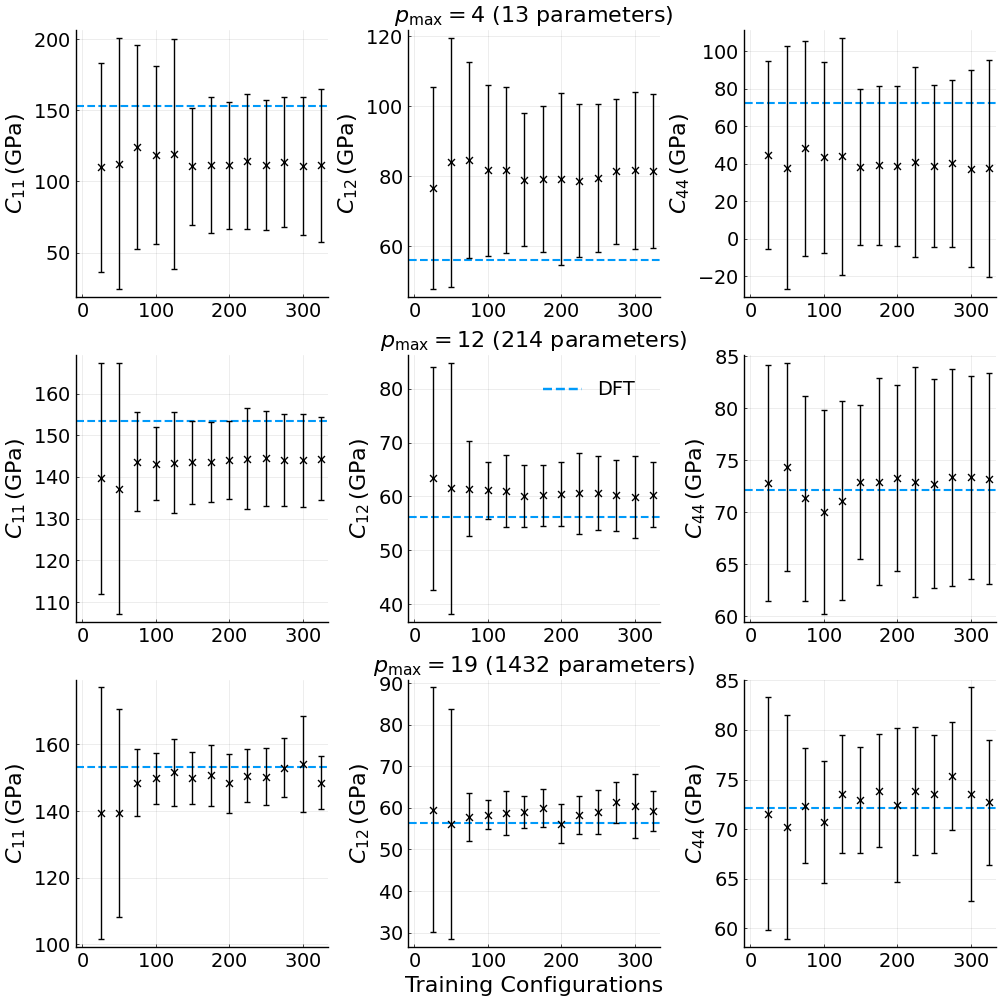

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [6]:
### Figure 4

### read in data
### <warning> since this was generated piece-wise, read-in and plotting looks slightly ugly...</warning>

function conformalpredictionset(mean,uncertainty,qhat)
    return [mean-qhat*uncertainty,mean+qhat*uncertainty]
end

ks = [25,50,75,100,125,150,175,200,225,250,275,300,325]

df_strings = [string("./outputs/elastic_constants/dia$(k).csv") for k in ks];
dfs4 = DataFrame.(CSV.File.(df_strings));

df_strings_ = [string("./outputs/elastic_constants/dia$(k)_part2.csv") for k in ks];
dfs4_ = DataFrame.(CSV.File.(df_strings_));

### setup (sub-)plots
p1 = plot()
hline!(p1,[dft_c11],ls=:dash,label="",xlabel="",lw=1.5,ylabel=L"C_{11} \, \mathrm{ (GPa)}")
p2 = plot()
hline!(p2,[dft_c12],ls=:dash,label="",xlabel="",lw=1.5,ylabel=L"C_{12} \, \mathrm{ (GPa)}")
p3 = plot()
hline!(p3,[dft_c44],ls=:dash,label="",xlabel="",lw=1.5,ylabel=L"C_{44} \, \mathrm{ (GPa)}")
p4 = plot()
hline!(p4,[dft_c11],ls=:dash,label="",xlabel="",lw=1.5,ylabel=L"C_{11} \, \mathrm{ (GPa)}")
p5 = plot()
hline!(p5,[dft_c12],ls=:dash,label="",xlabel="Training Configurations",lw=1.5,ylabel=L"C_{12} \, \mathrm{ (GPa)}")
p6 = plot()
hline!(p6,[dft_c44],ls=:dash,label="",xlabel="",lw=1.5,ylabel=L"C_{44} \, \mathrm{ (GPa)}")
p7 = plot();
hline!(p7,[dft_c11],ls=:dash,label="",ylabel=L"C_{11} \, \mathrm{ (GPa)}",xlabel="",lw=1.5);
p8 = plot();
hline!(p8,[dft_c12],ls=:dash,label="DFT",ylabel=L"C_{12} \, \mathrm{ (GPa)}",xlabel="",lw=1.5);
title!(p8,L"p_{\mathrm{max}} = 12 \,\, (214 \,\, \mathrm{ parameters})")
p9 = plot();
hline!(p9,[dft_c44],ls=:dash,label="",ylabel=L"C_{44} \, \mathrm{ (GPa)}",xlabel="",lw=1.5);

### enumerate throught relevant dataframes/plots

for x in [1,2]
    
    if x == 1
        ps = [p1,p2,p3]
        title!(ps[2],L"p_{\mathrm{max}} = 4 \,\, (13 \,\, \mathrm{ parameters})")
    else
        ps = [p4,p5,p6]
        title!(ps[2],L"p_{\mathrm{max}} = 19 \,\, (1432 \,\, \mathrm{ parameters})")
    end
    
    for (c,df) in enumerate(dfs4)

        c11,c12,c44 = UQPotentials.unpack_vecvec_of_3tuples(eval.(Meta.parse.(df[!,"QoI_list"])));

        c11,c12,c44 = c11[x],c12[x],c44[x]

        q̂ = df.q̂_list[x]

        for (count,QoI) in enumerate([c11,c12,c44])

            mu = mean(QoI)
            sigma = std(QoI)

            scatter!(ps[count],[ks[c]],[mu],yerr=q̂*sigma,label="",markercolour=:black,marker=:x,ms=5)

        end
    end
end

x=1

ps = [p7,p8,p9]
for (c,df) in enumerate(dfs4_)

    c11,c12,c44 = UQPotentials.unpack_vecvec_of_3tuples(eval.(Meta.parse.(df[!,"QoI_list"])));

    c11,c12,c44 = c11[x],c12[x],c44[x]

    q̂ = df.q̂_list[x]

    for (count,QoI) in enumerate([c11,c12,c44])
        mu = mean(QoI)
        sigma = std(QoI)

        scatter!(ps[count],[ks[c]],[mu],yerr=q̂*sigma,label="",markercolour=:black,marker=:x,ms=5)
    end

end

### collect all subplots
ps = [p1,p2,p3,p7,p8,p9,p4,p5,p6]

### plot!
plt4 = plot(ps...,layout=(3,3),size=(1000,1000));

# savefig(plt4, "./figures/Figure4.png")
savefig(plt4, "./figures/Figure4.pdf")
display(plt4)

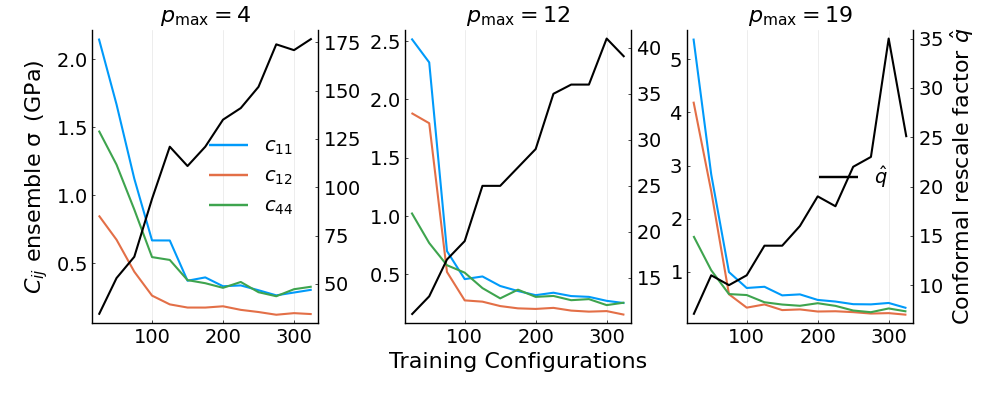

In [7]:
### Figure 5

q̂s = [i.q̂_list for i in dfs4]
q̂s = vecvec_to_matrix(q̂s)
cs = [UQPotentials.unpack_vecvec_of_3tuples(eval.(Meta.parse.(i[!,"QoI_list"]))) for i in dfs4]
q̂s_ = [i.q̂_list for i in dfs4_]
q̂s_ = vecvec_to_matrix(q̂s_)
cs_ = [UQPotentials.unpack_vecvec_of_3tuples(eval.(Meta.parse.(i[!,"QoI_list"]))) for i in dfs4_]

c11sigmas = []
c12sigmas = []
c44sigmas = []
c11sigmas_ = []
c12sigmas_ = []
c44sigmas_ = []
for i in 1:length(cs)
    push!(c11sigmas,std.(cs[i][1]))
    push!(c12sigmas,std.(cs[i][2]))
    push!(c44sigmas,std.(cs[i][3]))
    push!(c11sigmas_,std.(cs_[i][1]))
    push!(c12sigmas_,std.(cs_[i][2]))
    push!(c44sigmas_,std.(cs_[i][3]))
end
c11sigmas = vecvec_to_matrix(c11sigmas)
c12sigmas = vecvec_to_matrix(c12sigmas)
c44sigmas = vecvec_to_matrix(c44sigmas)
c11sigmas_ = vecvec_to_matrix(c11sigmas_)
c12sigmas_ = vecvec_to_matrix(c12sigmas_)
c44sigmas_ = vecvec_to_matrix(c44sigmas_)

p1 = plot(bottom_margin=7Plots.mm,left_margin=6Plots.mm,xticks=(ks[4:4:end],string.(Int.(ks))[4:4:end]))
xlabel!("")
ylabel!(L"C_{ij} \,\, \mathrm{ensemble \,\, \sigma} \,\,\, \mathrm{ (GPa)}")
title!(L"p_{\mathrm{max}} = 4")
plot!(p1,ks,c11sigmas[:,1],label=L"c_{11}",legend=:right)
plot!(p1,ks,c12sigmas[:,1],label=L"c_{12}")
plot!(p1,ks,c44sigmas[:,1],label=L"c_{44}")
plot!(twinx(),ks,q̂s[:,1],colour=:black,label="")

p2 = plot(bottom_margin=7Plots.mm,right_margin=6Plots.mm,xticks=(ks[4:4:end],string.(Int.(ks))[4:4:end]))
xlabel!("")
title!(L"p_{\mathrm{max}} = 19")
plot!(p2,ks,c11sigmas[:,2],label="",legend=:topleft)
plot!(p2,ks,c12sigmas[:,2],label="")
plot!(p2,ks,c44sigmas[:,2],label="")
plot!(twinx(),ks,q̂s[:,2],colour=:black,label=L"\hat{q}",ylabel=L"\mathrm{Conformal \,\, rescale \,\, factor \,\,} \hat{q}",legend=:right)

p3 = plot(bottom_margin=7Plots.mm,xticks=(ks[4:4:end],string.(Int.(ks))[4:4:end]))
xlabel!("Training Configurations")
title!(L"p_{\mathrm{max}} = 12")
plot!(p3,ks,c11sigmas_[:,1],label="",legend=:topleft)
plot!(p3,ks,c12sigmas_[:,1],label="")
plot!(p3,ks,c44sigmas_[:,1],label="")
plot!(twinx(),ks,q̂s_[:,1],colour=:black,label="")

plt5 = plot(p1,p3,p2,layout=(1,3),size=(1000,400));

# savefig(plt5, "./figures/Figure5.png")
# savefig(plt5, "./figures/Figure5.pdf")
display(plt5)

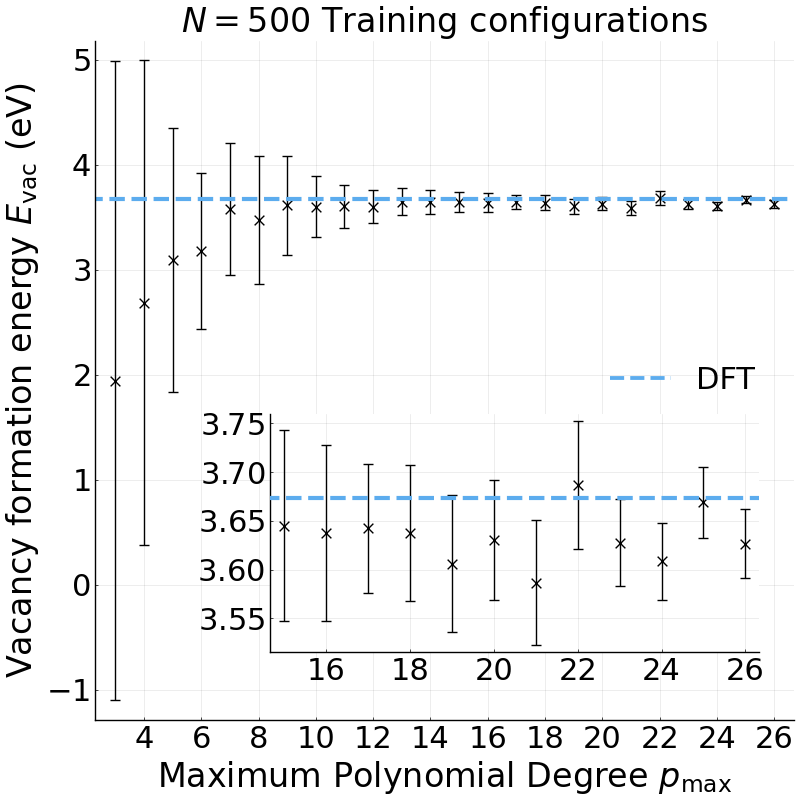

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [8]:
### Figure 6

### list of max poly degrees (see csv's)
deg_site_list = collect(3:26);

### read in data
df6 = DataFrame(CSV.File("./outputs/vacancy_formation_energy/dia_vacancy_divacancy500.csv"));
df6_ = DataFrame(CSV.File("./outputs/vacancy_formation_energy/dia_vacancy_divacancy500_part2.csv"));
### combine both dataframes
df6 = vcat(df6,df6_);

### extract list(s) of vfe data from df6
### so vfe_data is vector of vectors.
vfe_data = eval.(Meta.parse.(df6[!,"QoI_list"]))

### Figure 6 plot
plt6 = plot(deg_site_list, mean.(vfe_data), yerror=df6.q̂_list.*std.(vfe_data), label="",
    xticks=(deg_site_list[2:2:end],string.(Int.(deg_site_list))[2:2:end]), 
    legend=:right, xlabel=L"\mathrm{Maximum \,\, Polynomial \,\, Degree} \,\, p_{\mathrm{max}}", 
    ylabel=L"\mathrm{Vacancy \,\, formation \,\, energy} \,\, E_{\mathrm{vac}} \,\, \mathrm{(eV)}",
    seriestype=:scatter, marker=:x, markercolour=:black,
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,
    ytickfontsize=22,legendfontsize=22,titlefontsize=24,ms=7);
title!(plt6, L"N = 500 \,\, \mathrm{Training \,\, configurations}");

### add DFT reference value
hline!(plt6,[dft_vfe], ls=:dash, label="DFT", lw=3.0, colour=:steelblue2);

### add inset of last few points
### last 12 points
n_ = 11
plot!(plt6, deg_site_list[end-n_:end], mean.(vfe_data)[end-n_:end], 
    yerror=df6.q̂_list[end-n_:end].*std.(vfe_data)[end-n_:end], label="",
    xticks=(deg_site_list[end-n_:end][2:2:end],string.(Int.(deg_site_list[end-n_:end]))[2:2:end]),
    inset = (1, bbox(0.05, 0.1, 0.7, 0.35, :bottom, :right)), subplot=2,
    seriestype=:scatter, marker=:x, markercolour=:black,
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,
    ytickfontsize=22,legendfontsize=22,titlefontsize=24,ms=7);

### add DFT reference value to subplot
hline!(plt6, [dft_vfe], ls=:dash, label="", lw=3.0, subplot=2, colour=:steelblue2);

# savefig(plt6, "./figures/Figure6.png")
savefig(plt6, "./figures/Figure6.pdf")
display(plt6)

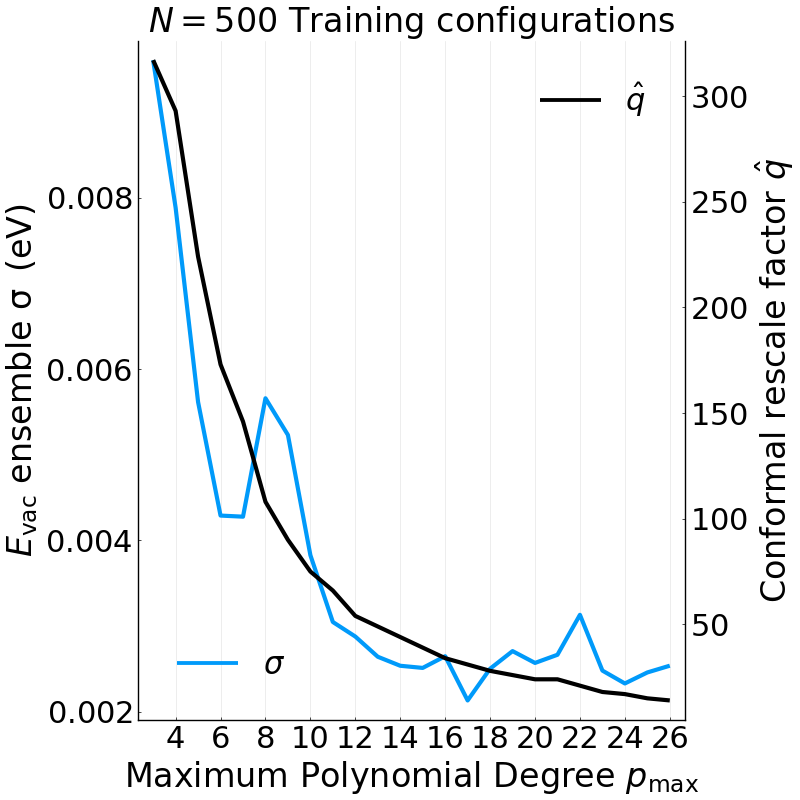

In [9]:
### Figure 7
deg_site_list = collect(3:26);

plt7 = plot(xlabel=L"\mathrm{Maximum \,\, Polynomial \,\, Degree} \,\, p_{\mathrm{max}}", ylabel=L"E_{\mathrm{vac}} \,\, \mathrm{ensemble \,\, \sigma} \,\,\, \mathrm{ (eV)}",
            colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,
            ytickfontsize=22, legendfontsize=22,titlefontsize=24,lw=3.0);
title!(L"N = 500 \,\, \mathrm{Training \,\, configurations}");

plot!(plt7, deg_site_list, std.(vfe_data), label=L"\sigma", legend=:bottomleft,
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,
    ytickfontsize=22, legendfontsize=22,titlefontsize=24,
    xticks=(deg_site_list[2:2:end],string.(Int.(deg_site_list))[2:2:end]),lw=3.0);
plot!(twinx(), deg_site_list, df6.q̂_list, colour=:black, label=L"\hat{q}", ylabel=L"\mathrm{Conformal \,\, rescale \,\, factor \,\,} \hat{q}",lw=3.0,
    colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,
    ytickfontsize=22, legendfontsize=22,titlefontsize=24);

# savefig(plt7, "./figures/Figure7.png")
# savefig(plt7, "./figures/Figure7.pdf")
display(plt7)

In [10]:
function unpackvacancymigrationoutput(vm_output)
    
    obj1 = Vector{Float64}(undef,length(vm_output))
    obj2 = Vector{Vector{Real}}(undef,length(vm_output))
    obj3 = Vector{Vector{Float64}}(undef,length(vm_output))
    obj4 = Vector{Vector{Float64}}(undef,length(vm_output))
    obj5 = Vector{Vector{Float64}}(undef,length(vm_output))
    
    for (count,obj) in enumerate(vm_output)
        obj1[count] = obj[1]
        obj2[count] = obj[2]
        obj3[count] = obj[3]
        obj4[count] = obj[4]
        obj5[count] = obj[5]
    end
    return obj1,obj2,obj3,obj4,obj5
end

unpackvacancymigrationoutput (generic function with 1 method)

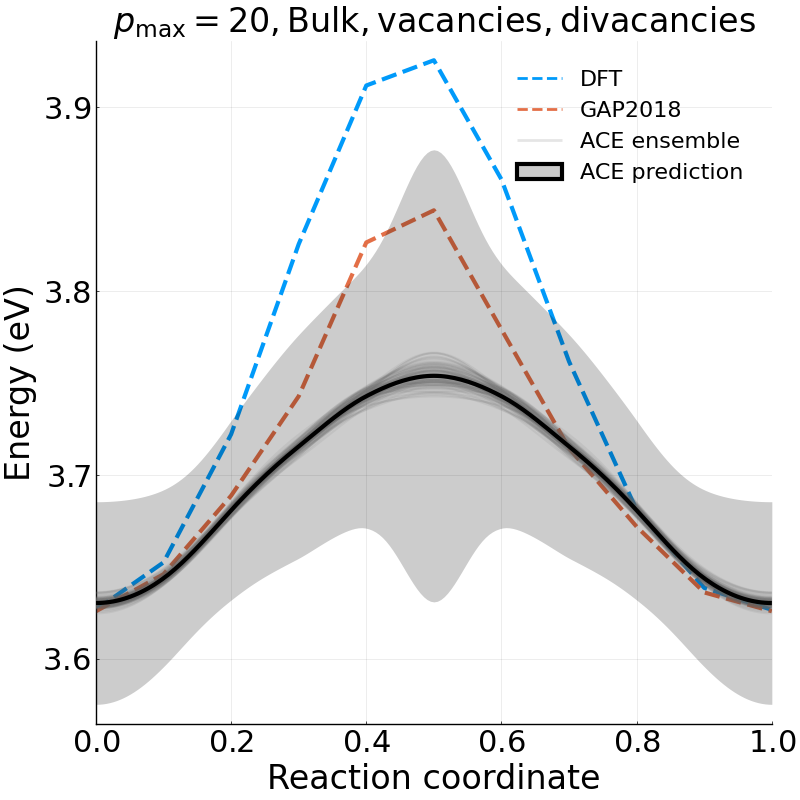

In [11]:
### Figure 8

function vacancy_migration_plot(fit_positions, fit_Es, q̂, dft_vfe, dft_migration_path, gap_migration_path)

    p1 = plot(xlabel="Reaction coordinate", ylabel="Energy (eV)", 
        title = L"p_{\mathrm{max}} = 20, \mathrm{Bulk, vacancies, divacancies}",
        colorbar_titlefontsize=24,xguidefontsize=24,yguidefontsize=24,colorbar_tickfontsize=22,xtickfontsize=22,
        ytickfontsize=22, legendfontsize=16,titlefontsize=24,lw=3.0,ms=7.0)
      
    ### plot DFT path
    dft_pos = LinRange(0.0,1.0,length(dft_migration_path))
    plot!(p1,dft_pos,dft_migration_path,label="DFT",ls=:dash,lw=3.0)
    
    ### plot GAP path
    plot!(p1,dft_pos,gap_migration_path,label="GAP2018",ls=:dash,lw=3.0)
    
    ### mean and stdev of energy across path
    mean_fit_Es = mean(fit_Es)
    std_fit_Es = std(fit_Es)
        
    ### normalise fit positions between 0 and 1
    fit_positions = [fit_positions[i] ./ maximum(fit_positions[i]) for i in 1:length(fit_positions)]
    
    ### plot samples, only label one
    for i in 1:length(fit_positions)
        if i == 1
            plot!(p1,fit_positions[i],fit_Es[i],colour=:grey,linealpha=0.2,label="ACE ensemble")
        else
            plot!(p1,fit_positions[i],fit_Es[i],colour=:grey,label="",linealpha=0.1)
        end
    end

    ### plot conformal uncertainty bound and mean result
    plot!(p1,mean(fit_positions),mean_fit_Es,ribbon=std_fit_Es.*q̂,fillalpha=0.2,label="ACE prediction",colour=:black,
        margin=1Plots.mm,lw=3.0)
    xlims!(p1,(0.0,1.0))
    
    return p1

end

### read in data
df8 = DataFrame(CSV.File("./outputs/vacancy_migration/dia_vacancy_divacancy500_degsite_20.csv"));
### get vacancy migration output
vm_output = eval.(Meta.parse.(df8.QoI_list[1]));
### ...and unpack it
# E_barriers, image_positions, image_Es, fit_positions, fit_Es = QoIEvaluators.unpackvacancymigrationoutput(vm_output);
E_barriers, image_positions, image_Es, fit_positions, fit_Es = unpackvacancymigrationoutput(vm_output);


### GAP 2018 vacancy migration path of 11 images for comparison
gap_migration_path = [3.6259608502259653, 3.6460762463193532, 3.6887600503469002, 3.742852516588755, 3.826427906509707, 3.8438765685532417, 
                        3.7791041360778763, 3.7145744405952428, 3.671911670360714, 3.6361868756048352, 3.6259628126226744]

### and do plotting using function above
plt8 = vacancy_migration_plot(fit_positions, fit_Es, df8.q̂_list[1], dft_vfe, dft_migration_path, gap_migration_path);

# savefig(plt8, "./figures/Figure8.png")
# savefig(plt8, "./figures/Figure8.pdf")
display(plt8)